/tmp/ipython-input-4275517677.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
/tmp/ipython-input-4275517677.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

Accuracy: 79.33%


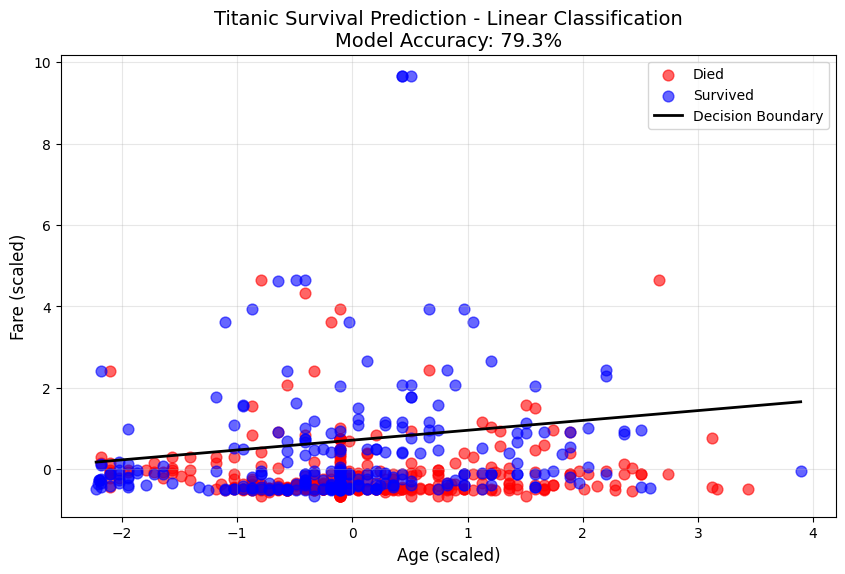


Final Model Accuracy: 79.33%
Saved as titanic_classification.png


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Load Titanic data
data = pd.read_csv('titanic(1).csv')

# Prepare data - add more features for better accuracy
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Fare'].fillna(data['Fare'].median(), inplace=True)

# Use multiple features for training
X = data[['Pclass', 'Sex', 'Age', 'Fare']].values
y = data['Survived'].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Get accuracy
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# For visualization, use just 2 features (Age and Fare)
X_viz = data[['Age', 'Fare']].values
X_viz_scaled = scaler.fit_transform(X_viz)
y_viz = data['Survived'].values

# Split for visualization
indices = np.arange(len(X_viz))
train_idx, test_idx = train_test_split(indices, test_size=0.2, random_state=42)
X_train_viz = X_viz_scaled[train_idx]
y_train_viz = y_viz[train_idx]

# Train simple model for visualization
model_viz = LogisticRegression(max_iter=1000)
model_viz.fit(X_train_viz, y_train_viz)

# Create visualization
plt.figure(figsize=(10, 6))

# Plot points
died = y_train_viz == 0
survived = y_train_viz == 1
plt.scatter(X_train_viz[died, 0], X_train_viz[died, 1],
           color='red', label='Died', alpha=0.6, s=60)
plt.scatter(X_train_viz[survived, 0], X_train_viz[survived, 1],
           color='blue', label='Survived', alpha=0.6, s=60)

# Draw decision boundary line
w = model_viz.coef_[0]
b = model_viz.intercept_[0]
x_line = np.linspace(X_train_viz[:, 0].min(), X_train_viz[:, 0].max(), 100)
y_line = -(w[0] * x_line + b) / w[1]
plt.plot(x_line, y_line, color='black', linewidth=2, label='Decision Boundary')

plt.xlabel('Age (scaled)', fontsize=12)
plt.ylabel('Fare (scaled)', fontsize=12)
plt.title(f'Titanic Survival Prediction - Linear Classification\nModel Accuracy: {accuracy*100:.1f}%', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('titanic_classification.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\nFinal Model Accuracy: {accuracy * 100:.2f}%")
print("Saved as titanic_classification.png")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')